In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardataset/data.csv


In [2]:
df = pd.read_csv("/kaggle/input/cardataset/data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


### Data Preparation

#### Columns



In [3]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [4]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Data

In [5]:
str_col = list(df.dtypes[df.dtypes == object].index)

In [6]:
for col in str_col:
    df[col] = df[col].str.lower().str.replace(" ","_")
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


#### EDA

In [7]:
for col in df.columns:
    print(col)
    print()
    print(df[col].unique()[:5])
    print((df[col].nunique()))
    print()
    print()
    

make

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48


model

['1_series_m' '1_series' '100' '124_spider' '190-class']
914


year

[2011 2012 2013 1992 1993]
28


engine_fuel_type

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10


engine_hp

[335. 300. 230. 320. 172.]
356


engine_cylinders

[ 6.  4.  5.  8. 12.]
9


transmission_type

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5


driven_wheels

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4


number_of_doors

[ 2.  4.  3. nan]
3


market_category

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71


vehicle_size

['compact' 'midsize' 'large']
3


vehicle_style

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16


highway_mpg

[26 28 27 25 24]
59


city_mpg

[19 20 18 17 16]
69


popularity

[3916 3105  819  617 1013]
48


msr

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


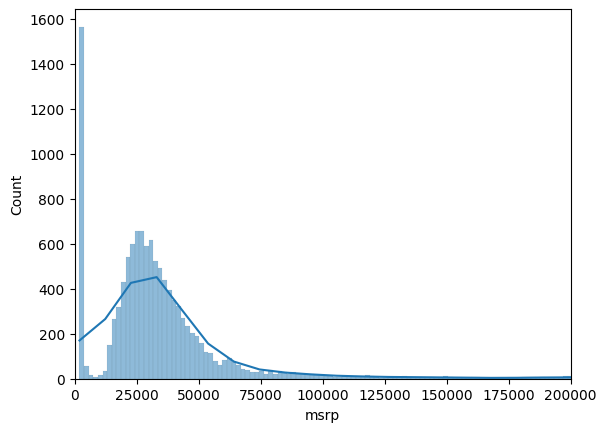

In [9]:
sns.histplot(df.msrp,kde=True)
plt.xlim(0, 200_000)
plt.show()

**A high part of the price distribution is between 0 and 50K. We have a right-skewed distrib**

In [10]:
df.msrp.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

#### Normalization by logarithm

In [11]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

The np.log1p function is the equivalent of log(1+x) because log(x<1) is negative and we want only positive value in our Series.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

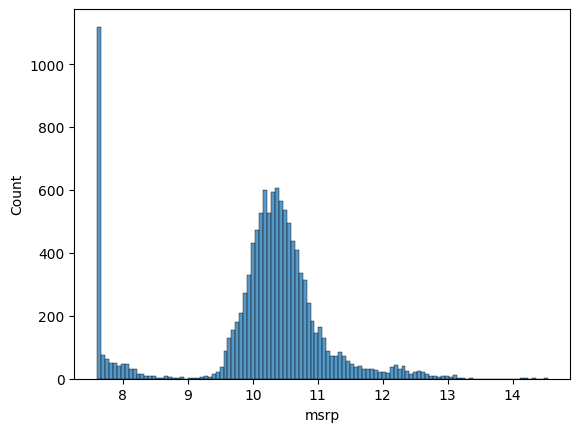

In [12]:
sns.histplot(price_logs)

It looks like more a normal distribution which is better for modelling in ML.

#### Missing values


In [13]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [14]:
df["market_category"].unique()[:5]

array(['factory_tuner,luxury,high-performance', 'luxury,performance',
       'luxury,high-performance', 'luxury', 'performance'], dtype=object)

In [15]:
df.isnull().sum()[df.dtypes == object]

make                    0
model                   0
engine_fuel_type        3
transmission_type       0
driven_wheels           0
market_category      3742
vehicle_size            0
vehicle_style           0
dtype: int64

In [16]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


#### Train/validation/test samples

In [17]:
train_n = int(len(df)*0.6)
val_n = int(len(df)*0.2)
test_n = int(len(df)*0.2)

len(df) , train_n + val_n + test_n, train_n,val_n,test_n

(11914, 11912, 7148, 2382, 2382)

In [18]:
x_train = df.iloc[:train_n]
x_val = df.iloc[train_n: train_n +val_n]
x_test = df.iloc[train_n + val_n:len(df)]

In [19]:
len(x_train),len(x_val),len(x_test)

(7148, 2382, 2384)

In [20]:
np.random.seed(2)
idx = np.arange(len(df))
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [21]:
len(idx[:train_n]),len(idx[train_n: train_n +val_n]),len(idx[train_n + val_n:])

(7148, 2382, 2384)

In [22]:
x_train = df.iloc[idx[:train_n]]
x_val = df.iloc[idx[train_n: train_n +val_n]]
x_test = df.iloc[idx[train_n + val_n:]]


In [23]:
x_train.reset_index(drop = True,inplace = True)
x_val.reset_index(drop = True,inplace = True) 
x_test.reset_index(drop = True,inplace = True)

In [24]:
x_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995
7144,cadillac,dts,2010,premium_unleaded_(recommended),275.0,8.0,automatic,front_wheel_drive,4.0,luxury,large,sedan,23,15,1624,46280
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215


In [25]:
y_train = np.log1p(x_train.msrp.values)
y_val = np.log1p(x_val.msrp.values)
y_test = np.log1p(x_test.msrp.values)

In [26]:
del x_train["msrp"]
del x_val["msrp"]
del x_test["msrp"]




In [27]:
x_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


#### Linear regression from scratch

In [28]:
# random weights, coefficients or parameters, the linear regression model is for searching these items
w= [60,8,98]
#An instance of the dataset with 3 features by example
xi = x_train.iloc[10][["engine_hp","city_mpg","popularity"]].values
# Bias term
w0 = 0

In [29]:
def linear_regression(xi):
    pred = w0

    for j in np.arange(len(xi)):
        pred = pred + w[j]* xi[j]
    return pred

    

In [30]:
w = [0.01,0.04,0.002]
w0 = 7.17
pred = linear_regression(xi)

In [31]:
# When we use the log1p() function for transforming the target we have to use expm1() to have the real value of the target
np.expm1(pred)

222347.2221101062

In [32]:
x_train.iloc[10][["engine_hp","city_mpg","popularity"]]

engine_hp     453.0
city_mpg         11
popularity       86
Name: 10, dtype: object

#### Linear regression : vector form

In [33]:
def dot(xi,w):
    res = 0.0
    n = len(xi)
    for j in np.arange(n):
        res = res + xi[j]* w[j]

    return res

In [34]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [35]:
linear_regression(x_train.iloc[10][["engine_hp","city_mpg","popularity"]].values)

12.312000000000001

In [36]:
x1 = x_train.iloc[10][["engine_hp","city_mpg","popularity"]].values
x2 = x_train.iloc[45][["engine_hp","city_mpg","popularity"]].values
x3 = x_train.iloc[30][["engine_hp","city_mpg","popularity"]].values
x1,x2,x3

(array([453.0, 11, 86], dtype=object),
 array([240.0, 21, 3916], dtype=object),
 array([302.0, 18, 617], dtype=object))

In [37]:
X = np.array([x1,x2,x3])
X

array([[453.0, 11, 86],
       [240.0, 21, 3916],
       [302.0, 18, 617]], dtype=object)

In [38]:
arr = np.column_stack((np.ones(X.shape[0], dtype=int), X))
arr

array([[1, 453.0, 11, 86],
       [1, 240.0, 21, 3916],
       [1, 302.0, 18, 617]], dtype=object)

In [39]:
w_new = [w0] + w
w_new 

[7.17, 0.01, 0.04, 0.002]

In [40]:
# predictions
arr.dot(w_new)

array([12.312, 18.242, 12.144], dtype=object)

#### train a linear regression from scratch

In [41]:
a = []
for _ in range(9):
    x = x_train.iloc[np.random.randint(0, len(x_train))][["engine_hp","city_mpg","popularity"]].values
    a.append(x)

X = np.array(a,dtype = float)
X

array([[ 170.,   24.,  873.],
       [ 278.,   19., 2202.],
       [ 230.,   11., 1851.],
       [ 244.,   16., 1851.],
       [ 510.,   12.,  259.],
       [ 435.,   14., 5657.],
       [ 255.,   19.,  454.],
       [ 174.,   31., 2202.],
       [ 182.,   12.,  258.]])

In [42]:
X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
X

array([[1.000e+00, 1.700e+02, 2.400e+01, 8.730e+02],
       [1.000e+00, 2.780e+02, 1.900e+01, 2.202e+03],
       [1.000e+00, 2.300e+02, 1.100e+01, 1.851e+03],
       [1.000e+00, 2.440e+02, 1.600e+01, 1.851e+03],
       [1.000e+00, 5.100e+02, 1.200e+01, 2.590e+02],
       [1.000e+00, 4.350e+02, 1.400e+01, 5.657e+03],
       [1.000e+00, 2.550e+02, 1.900e+01, 4.540e+02],
       [1.000e+00, 1.740e+02, 3.100e+01, 2.202e+03],
       [1.000e+00, 1.820e+02, 1.200e+01, 2.580e+02]])

In [43]:
XTX = X.T.dot(X)
XTX

array([[9.0000000e+00, 2.4780000e+03, 1.5800000e+02, 1.5607000e+04],
       [2.4780000e+03, 7.9637000e+05, 4.0429000e+04, 4.7766990e+06],
       [1.5800000e+02, 4.0429000e+04, 3.1200000e+03, 2.7505700e+05],
       [1.5607000e+04, 4.7766990e+06, 2.7505700e+05, 4.9653549e+07]])

In [44]:
XTX_inv = np.linalg.inv(XTX)

In [45]:
y = [12000,130000,34000,34000,65000,5400,56000,235000,34000]
w_full = XTX_inv.dot(X.T).dot(y)


In [46]:
w0 = w_full[0]
w = w_full[1:]
w0,w

(-110890.68492626004,
 array([ 1.16414561e+02,  8.73050926e+03, -4.13145253e+00]))

In [47]:
a = []
for _ in range(9):
    x = x_train.iloc[np.random.randint(0, len(x_train))][["engine_hp","city_mpg","popularity"]].values
    a.append(x)

X = np.array(a,dtype = float)
X

array([[ 165.,   15., 1385.],
       [ 173.,   24., 1439.],
       [ 200.,   42., 2031.],
       [ 303.,   16.,  190.],
       [ 400.,   18., 1715.],
       [ 138.,   23., 1720.],
       [ 291.,   17.,  436.],
       [ 196.,   25., 1385.],
       [  nan,  120., 1720.]])

In [48]:
def train_linear_regression(X,y):
    X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]


In [49]:
train_linear_regression(X,y)

(nan, array([nan, nan, nan]))

#### Baseline model

In [50]:
x_train[x_train.dtypes[x_train.dtypes != object].index].isnull().sum()

year                 0
engine_hp           40
engine_cylinders    14
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [51]:
x_train[x_train.dtypes[x_train.dtypes != object].index]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,2008,148.0,4.0,2.0,33,24,1385
1,2012,132.0,4.0,4.0,32,25,2031
2,2016,148.0,4.0,4.0,37,28,640
3,1991,90.0,4.0,3.0,18,16,873
4,2017,385.0,8.0,4.0,21,15,5657
...,...,...,...,...,...,...,...
7143,2006,221.0,6.0,4.0,26,17,61
7144,2010,275.0,8.0,4.0,23,15,1624
7145,2015,300.0,6.0,2.0,31,20,3916
7146,2015,210.0,4.0,2.0,30,24,873


**Fill Nan Values** 

In [52]:
X_train = x_train[x_train.dtypes[x_train.dtypes != object].index].fillna(0)
X_train.isnull().sum()

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [53]:
X_train = X_train.values

In [54]:
w0,w = train_linear_regression(X_train,y_train)

In [55]:
y_pred = w0 + X_train.dot(w)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

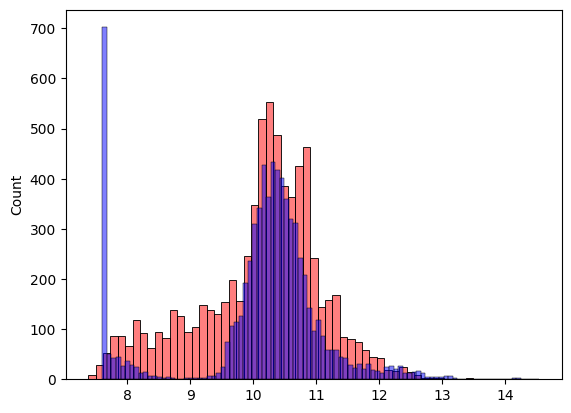

In [56]:
sns.histplot(y_pred,color = "red",alpha = 0.5)
sns.histplot(y_train,color = "blue",alpha = 0.5)


#### Root Mean Squared Error: RMSE

**RMSE for training set**

In [57]:
def rmse(y,y_pred):
    squared_error = (y - y_pred)**2
    mean_squared_error = squared_error.mean()
    return np.sqrt(mean_squared_error)
    

In [58]:
rmse(y_train,y_pred)

0.5171735013836418

**RMSE for validation set**

In [59]:
def prepare_data(X):
    X = X[X.dtypes[X.dtypes != object].index].fillna(0)
    X = X.values
    return X
    
    

In [60]:
X_val = prepare_data(x_val)

In [61]:
y_pred = w0 + X_val.dot(w)
y_pred

array([12.12200159, 10.46744569, 10.23777966, ..., 10.44711176,
       11.51161737, 10.85112373])

In [62]:
rmse(y_val,y_pred)

0.5167405563999826

#### Feature engineering

**You can change some variables, add or combine for searching a better performance.**

**You retrain the model with these new features and compare to other RMSE for training/validation**

#### Categorical features

**Add a categorical "number_of_doors" variable**

In [63]:
def prepare_data(X):
    X = X.copy()
    X = X[X.dtypes[X.dtypes != object].index].fillna(0)
    X["age"] = 2017 - X.year
    for v in [2,3,4]:
        X["num_doors_%s" % v] = (X["number_of_doors"]==v).astype("int")
    del X["number_of_doors"]
    del X["year"]

    X = X.values
    return X

In [64]:
prepare_data(x_train).shape

(7148, 9)

In [65]:
X_train = prepare_data(x_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_data(x_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5157158684881102

**Add a categorical "make" variable**

In [66]:
x_train["make"].value_counts().head()

make
chevrolet     667
ford          519
volkswagen    488
toyota        452
dodge         367
Name: count, dtype: int64

In [67]:
def prepare_data(X):
    X = X.copy()
    # makes categorical encoding with
    makes = list(X["make"].value_counts().head().index)
    for v in makes:
        X["makes_%s" % v] = (X["make"]== v).astype("int")
    X = X[X.dtypes[X.dtypes != object].index].fillna(0)
    # Year feature engineering
    X["age"] = 2017 - X.year
    # number of doors categorical encoding
    for v in [2,3,4]:
        X["num_doors_%s" % v] = (X["number_of_doors"]==v).astype("int")
        
    del X["number_of_doors"]
    del X["year"]

    X = X.values
    return X

In [68]:
X_train = prepare_data(x_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_data(x_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.5074572881971682

**Add some other categorical features**

In [69]:
object_col = list(x_train.dtypes[x_train.dtypes == object].index)
[col for col in object_col if col != 'make']

['model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [70]:
for col in object_col:
    print (col)
    print()
    print(x_train[col].value_counts().head())
    print()

make

make
chevrolet     667
ford          519
volkswagen    488
toyota        452
dodge         367
Name: count, dtype: int64

model

model
silverado_1500    92
tundra            85
f-150             71
sierra_1500       61
tacoma            56
Name: count, dtype: int64

engine_fuel_type

engine_fuel_type
regular_unleaded                  4318
premium_unleaded_(required)       1186
premium_unleaded_(recommended)     920
flex-fuel_(unleaded/e85)           531
diesel                              94
Name: count, dtype: int64

transmission_type

transmission_type
automatic           4920
manual              1789
automated_manual     382
direct_drive          42
unknown               15
Name: count, dtype: int64

driven_wheels

driven_wheels
front_wheel_drive    2882
rear_wheel_drive     2024
all_wheel_drive      1381
four_wheel_drive      861
Name: count, dtype: int64

market_category

market_category
crossover             647
flex_fuel             520
luxury                512
hatchback 

In [71]:
categories = {}
for c in object_col:
    categories[c] = list(x_train[c].value_counts().head().index)
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [72]:
X = x_train.copy()
for col,categ in categories.items():
        for c in categ:
            X["%s_%s" % (col,c)] = (X[col] == c).astype("int")

In [73]:
X

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,market_category_hatchback,"market_category_luxury,performance",vehicle_size_compact,vehicle_size_midsize,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr_suv,vehicle_style_coupe,vehicle_style_convertible,vehicle_style_4dr_hatchback
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,...,0,0,1,0,0,0,0,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,...,1,0,1,0,0,0,0,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,...,1,0,1,0,0,0,0,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,...,0,0,0,0,1,0,0,0,0,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,...,0,0,0,1,0,1,0,0,0,0
7144,cadillac,dts,2010,premium_unleaded_(recommended),275.0,8.0,automatic,front_wheel_drive,4.0,luxury,...,0,0,0,0,1,1,0,0,0,0
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",...,0,1,0,1,0,0,0,0,1,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",...,0,0,1,0,0,0,0,0,0,0


In [74]:
def prepare_data(X):
    X = X.copy()
    # makes categorical encoding with
    makes = list(X["make"].value_counts().head().index)
    for v in makes:
        X["makes_%s" % v] = (X["make"]== v).astype("int")
    # some other categorical vars
    object_col = list(X.dtypes[X.dtypes == object].index)
    object_col = [col for col in object_col if col != 'make']
    categories = {}
    for c in object_col:
        categories[c] = list(X[c].value_counts().head().index)
    for col,categ in categories.items():
        for c in categ:
            X["%s_%s" % (col,c)] = (X[col] == c).astype("int")
    
    X = X[X.dtypes[X.dtypes != object].index].fillna(0)
    # Year feature engineering
    X["age"] = 2017 - X.year
    # number of doors categorical encoding
    for v in [2,3,4]:
        X["num_doors_%s" % v] = (X["number_of_doors"]==v).astype("int")
        
    del X["number_of_doors"]
    del X["year"]

    X = X.values
    return X

In [75]:
X_train = prepare_data(x_train)
w0,w = train_linear_regression(X_train,y_train)
X_val = prepare_data(x_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

1773.468264702817

#### Regularization

In [76]:
def train_linear_regression_regularized(X,y,r= 0.001):
    X = np.column_stack((np.ones(X.shape[0], dtype=int), X))
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [77]:
X_train = prepare_data(x_train)
w0,w = train_linear_regression_regularized(X_train,y_train,0.0001)
X_val = prepare_data(x_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)

0.482282515750712

#### FIne-tune the model with regularization

In [78]:
for r in [0.00001,0.0001,0.001,0.01,0.1,1,10]:
    X_train = prepare_data(x_train)
    w0,w = train_linear_regression_regularized(X_train,y_train,r)
    X_val = prepare_data(x_val)
    y_pred = w0 + X_val.dot(w)
    print(r,w0,rmse(y_val,y_pred))

1e-05 -8.455753381709423 0.48228243024351
0.0001 6.005747661419315 0.482282515750712
0.001 6.318599769335066 0.48228347076578065
0.01 6.307709701804973 0.48229307318260434
0.1 6.221678352192999 0.48238899705662447
1 5.6606642778125655 0.483379860733552
10 4.294881011537192 0.49747137464261737


#### Using the model

In [79]:
full_train = pd.concat([x_train, x_val])
full_train.reset_index(drop= True,inplace = True)
full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9525,bmw,7_series,2015,premium_unleaded_(required),445.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,17,3916
9526,volvo,xc90,2017,premium_unleaded_(recommended),316.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",large,4dr_suv,25,20,870
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238


In [80]:
X_full_train = prepare_data(full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [240.,   4.,  37., ...,   0.,   0.,   1.],
       [444.,   8.,  20., ...,   1.,   0.,   0.],
       [332.,   8.,  23., ...,   0.,   0.,   1.]])

In [81]:
y_full_train = np.concatenate([y_train,y_val])


In [82]:
w0,w = train_linear_regression_regularized(X_train,y_train,0.00001)
w

array([ 1.84600767e-03,  1.05193976e-01, -5.16327773e-03, -6.97944687e-03,
       -5.22824197e-05, -4.63780206e-02,  1.83669731e-01,  2.12407254e-02,
        4.81169661e-02, -1.41955353e-01, -2.80813070e-01, -6.95936116e-01,
       -3.05700616e-01, -3.51865278e-01, -4.29949288e-01, -4.25860108e-01,
        8.69184419e-02, -3.01447417e-01, -4.85324788e-01, -5.68300289e-02,
        1.39067627e+01,  1.37360913e+01,  1.39695939e+01,  1.55466218e+01,
        1.33091088e+01,  3.53970960e+00,  3.49139013e+00,  3.53919115e+00,
        3.52140845e+00, -7.49034079e-02,  1.10675708e-01, -4.77893625e-02,
        2.25359091e-02, -4.35764029e-02,  2.18005377e+00,  2.06680429e+00,
        2.07094395e+00, -9.66110682e-02, -1.64917325e-02,  1.65653844e-01,
        3.31412926e-01, -2.13417054e-01, -9.75872935e-02, -7.90386631e-01,
       -9.44800318e-01, -5.87847565e-01])

In [83]:
X_test = prepare_data(x_test)
y_pred = w0 + X_test.dot(w)
print(rmse(y_test,y_pred),X_test.shape)


0.45744765214748656 (2384, 46)


#### How your model is used in RW

In [84]:
def fit_prepare_data(X):
    X = X.copy()
    makes = list(X["make"].value_counts().head().index)
    object_col = [col for col in X.select_dtypes('object').columns if col != 'make']
    categories = {c: list(X[c].value_counts().head().index) for c in object_col}
    return {"makes": makes, "categories": categories}

def transform_prepare_data(X, info):
    X = X.copy()
    # encode make
    for v in info["makes"]:
        X[f"makes_{v}"] = (X["make"] == v).astype(int)
    # encode other categorical vars
    for col, categs in info["categories"].items():
        for c in categs:
            X[f"{col}_{c}"] = (X[col] == c).astype(int)
    # year / doors
    X["age"] = 2017 - X["year"]
    for v in [2, 3, 4]:
        X[f"num_doors_{v}"] = (X["number_of_doors"] == v).astype(int)
    # nettoyer
    for col in ["number_of_doors", "year"]:
        if col in X.columns:
            del X[col]
    # numerique uniquement
    X = X.select_dtypes(exclude="object").fillna(0)
    return X

In [85]:
info = fit_prepare_data(x_train)

In [86]:
car = x_test.iloc[10].to_dict()

In [87]:
df_car = pd.DataFrame([car])
df_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,corvette,2017,premium_unleaded_(recommended),460.0,8.0,manual,rear_wheel_drive,2.0,high-performance,compact,convertible,25,16,1385


In [88]:
transform_prepare_data(df_car,info)

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,makes_chevrolet,makes_ford,makes_volkswagen,makes_toyota,makes_dodge,...,vehicle_size_large,vehicle_style_sedan,vehicle_style_4dr_suv,vehicle_style_coupe,vehicle_style_convertible,vehicle_style_4dr_hatchback,age,num_doors_2,num_doors_3,num_doors_4
0,460.0,8.0,25,16,1385,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


You get a request from this form.

In [89]:
X_car = transform_prepare_data(df_car,info)

In [90]:
y_pred = w0 + X_car.dot(w)
y_pred[0]

11.522533793874006

In [91]:
np.expm1(y_pred[0])

100964.46370918755

This is the price prediction for this car

In [92]:
np.expm1(y_test[10])

69449.99999999999